In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['Chelonia_NE', 'leatherback_endanagred', 'Loggerhead_Sea_NE','salt_mud_NE','yellowbox_NE']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def load_data():
   
    
    datasets = ['F:/MCA - Sem 3/DIP/turtle', 'F:/MCA - Sem 3/DIP/turtle-test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading F:/MCA - Sem 3/DIP/turtle


100%|██████████| 230/230 [00:02<00:00, 84.54it/s] 


Loading F:/MCA - Sem 3/DIP/turtle-test


100%|██████████| 34/34 [00:00<00:00, 187.31it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1034
Number of testing examples: 167
Each image is of size: (150, 150)


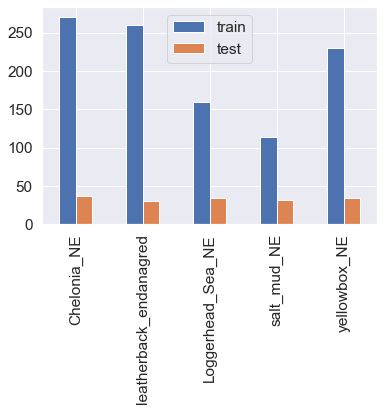

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

train_images = train_images / 255.0 
test_images = test_images / 255.0

In [10]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

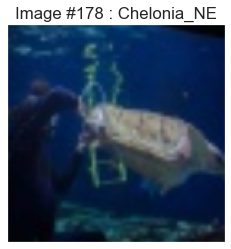

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(17,17))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

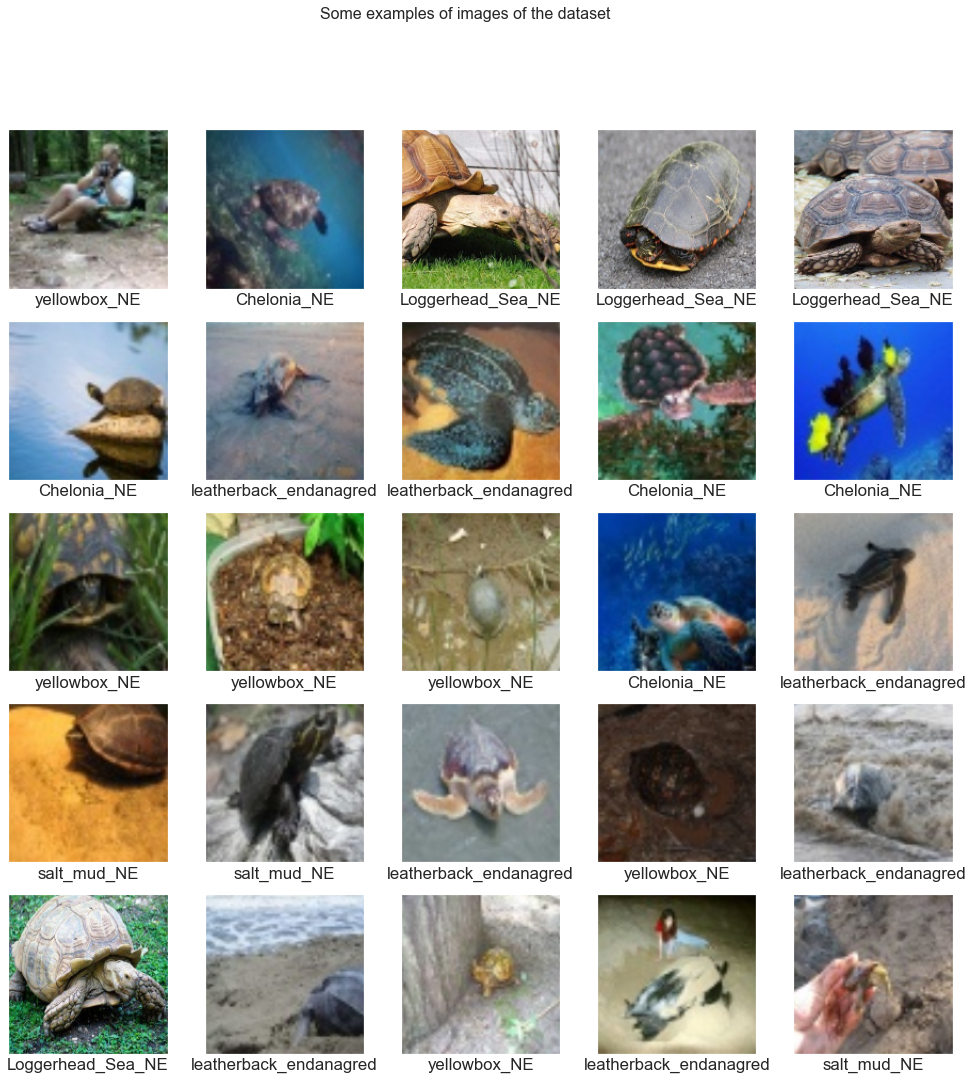

In [13]:
display_examples(class_names, train_images, train_labels)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
7/7 [==============================] - 21s 3s/step - loss: 2.8827 - accuracy: 0.2805 - val_loss: 1.5785 - val_accuracy: 0.2319
Epoch 2/20
7/7 [==============================] - 18s 3s/step - loss: 1.4570 - accuracy: 0.3482 - val_loss: 1.3665 - val_accuracy: 0.4155
Epoch 3/20
7/7 [==============================] - 18s 3s/step - loss: 1.2644 - accuracy: 0.5308 - val_loss: 1.1491 - val_accuracy: 0.5894
Epoch 4/20
7/7 [==============================] - 18s 3s/step - loss: 1.0830 - accuracy: 0.5925 - val_loss: 1.0711 - val_accuracy: 0.6135
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.9590 - accuracy: 0.6421 - val_loss: 0.9961 - val_accuracy: 0.6135
Epoch 6/20
7/7 [==============================] - 18s 3s/step - loss: 0.8787 - accuracy: 0.6626 - val_loss: 0.8748 - val_accuracy: 0.6860
Epoch 7/20
7/7 [==============================] - 19s 3s/step - loss: 0.7472 - accuracy: 0.7473 - val_loss: 0.8838 - val_accuracy: 0.6860
Epoch 8/20
7/7 [==================

In [17]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

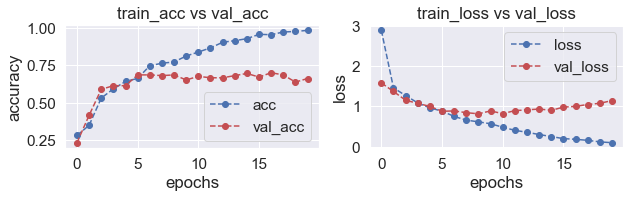

In [18]:
plot_accuracy_loss(history)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [20]:
test_loss = model.evaluate(test_images, test_labels)

6/6 [==============================] - 1s 114ms/step - loss: 0.4064 - accuracy: 0.9042


6/6 [==============================] - 1s 106ms/step


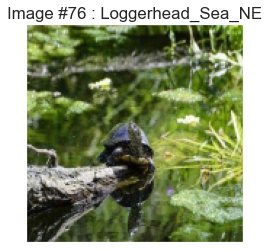

In [35]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [36]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [1]:
# print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

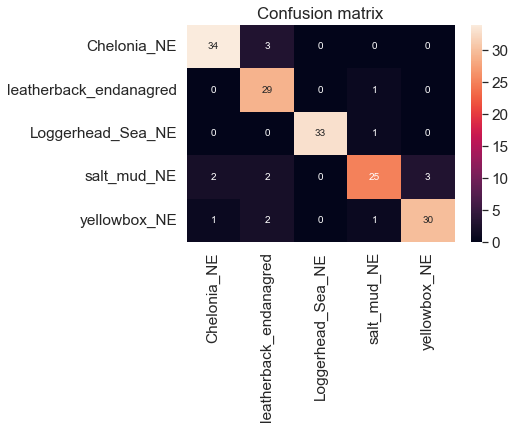

In [40]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [43]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [44]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

6/6 [==============================] - 21s 3s/step


In [45]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [46]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

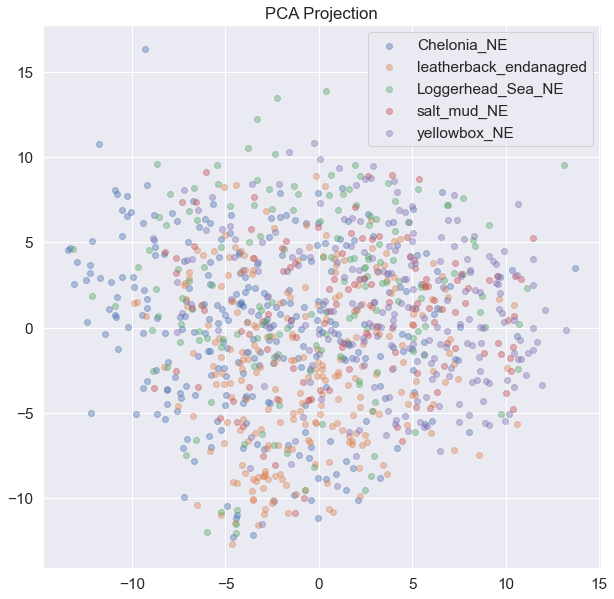

In [47]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [48]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
7/7 [==============================] - 2s 72ms/step - loss: 1.7924 - accuracy: 0.2684 - val_loss: 1.4633 - val_accuracy: 0.4251
Epoch 2/15
7/7 [==============================] - 0s 25ms/step - loss: 1.2463 - accuracy: 0.5320 - val_loss: 1.3004 - val_accuracy: 0.4783
Epoch 3/15
7/7 [==============================] - 0s 24ms/step - loss: 1.0268 - accuracy: 0.6191 - val_loss: 1.1916 - val_accuracy: 0.4976
Epoch 4/15
7/7 [==============================] - 0s 25ms/step - loss: 0.8771 - accuracy: 0.6892 - val_loss: 1.1363 - val_accuracy: 0.5362
Epoch 5/15
7/7 [==============================] - 0s 25ms/step - loss: 0.7740 - accuracy: 0.7437 - val_loss: 1.1007 - val_accuracy: 0.5314
Epoch 6/15
7/7 [==============================] - 0s 25ms/step - loss: 0.6897 - accuracy: 0.7485 - val_loss: 1.0448 - val_accuracy: 0.5507
Epoch 7/15
7/7 [==============================] - 0s 25ms/step - loss: 0.6087 - accuracy: 0.8162 - val_loss: 1.0361 - val_accuracy: 0.5700
Epoch 8/15
7/7 [===========

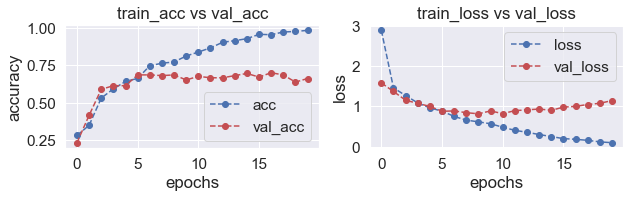

In [49]:
plot_accuracy_loss(history)

In [50]:
test_loss = model2.evaluate(test_features, test_labels)

6/6 [==============================] - 0s 6ms/step - loss: 0.4301 - accuracy: 0.8922


## Essemble NN

In [51]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [52]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [53]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
6/6 [==============================] - 2s 85ms/step - loss: 1.7685 - accuracy: 0.3589 - val_loss: 1.3522 - val_accuracy: 0.4819
Epoch 2/10
6/6 [==============================] - 0s 29ms/step - loss: 1.0991 - accuracy: 0.6048 - val_loss: 0.9960 - val_accuracy: 0.5904
Epoch 3/10
6/6 [==============================] - 0s 28ms/step - loss: 0.8053 - accuracy: 0.7070 - val_loss: 0.8565 - val_accuracy: 0.7108
Epoch 4/10
6/6 [==============================] - 0s 31ms/step - loss: 0.6389 - accuracy: 0.8078 - val_loss: 0.7134 - val_accuracy: 0.7590
Epoch 5/10
6/6 [==============================] - 0s 31ms/step - loss: 0.4990 - accuracy: 0.8441 - val_loss: 0.6214 - val_accuracy: 0.7952
Epoch 6/10
6/6 [==============================] - 0s 29ms/step - loss: 0.4071 - accuracy: 0.8938 - val_loss: 0.5839 - val_accuracy: 0.7952
Epoch 7/10
6/6 [==============================] - 0s 34ms/step - loss: 0.3390 - accuracy: 0.9167 - val_loss: 0.5439 - val_accuracy: 0.8434
Epoch 8/10
6/6 [===========

In [54]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

6/6 [==============================] - 0s 5ms/step


In [55]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8802395209580839
